# 301 - Nim

## Problem Statement

<dfn>Nim</dfn> is a game played with heaps of stones, where two players take it in turn to remove any number of stones from any heap until no stones remain.

We'll consider the three-heap normal-play version of Nim, which works as follows:

$\qquad$ At the start of the game there are three heaps of stones.<br>
$\qquad$ On each player's turn, the player may remove any positive number of stones from any single heap.<br>
$\qquad$ The first player unable to move (because no stones remain) loses.

If $(n_1,n_2,n_3)$ indicates a Nim position consisting of heaps of size $n_1$, $n_2$, and $n_3$, then there is a simple function, which you may look up or attempt to deduce for yourself, $X(n_1,n_2,n_3)$ that returns:

$\qquad$ zero if, with perfect strategy, the player about to move will eventually lose; or <br>
$\qquad$ non-zero if, with perfect strategy, the player about to move will eventually win.

For example $X(1,2,3) = 0$ because, no matter what the current player does, the opponent can respond with a move that leaves two heaps of equal size, at which point every move by the current player can be mirrored by the opponent until no stones remain; so the current player loses. To illustrate:

$\qquad$ current player moves to $(1,2,1)$<br>
$\qquad$opponent moves to $(1,0,1)$<br>
$\qquad$current player moves to $(0,0,1)$<br>
$\qquad$opponent moves to $(0,0,0)$, and so wins.

For how many positive integers $n \le 2^{30}$ does $X(n,2n,3n) = 0$ ?

## Solution

 A Nim position $(n_1, n_2, n_3)$ is losing if $n_1 \oplus n_2 \oplus n_3 = 0$. Let's simulate the results of games with $1 \leq n \leq 20000$ and observe at which $n$ values we have losing position.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

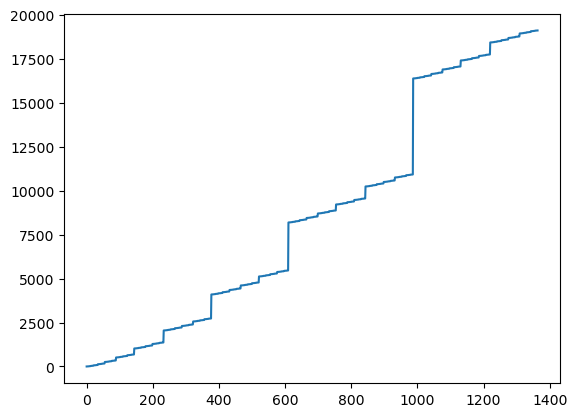

In [2]:
res = []
zeros = []
for i in range(20001):
    check = i ^ 2*i ^ 3*i
    res.append((check))
    if not check:
        zeros.append(i)

plt.plot(zeros);

It appears there is some structure in the index of losing games. Let's look at the differences (i.e., how far appart are the consecutive zero values).

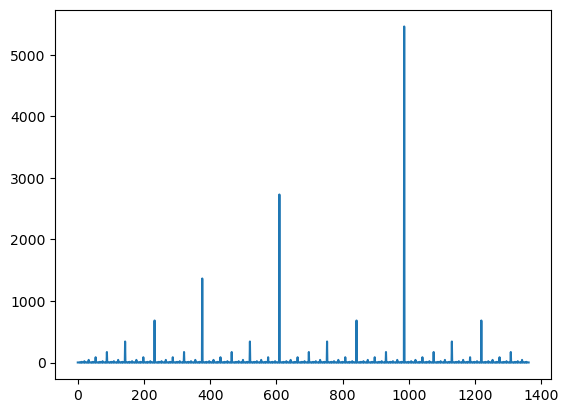

In [3]:
diff = [zeros[i] - zeros[i - 1] for i in range(1, len(zeros))]

plt.plot(diff);

Looking at the difference values, we observe some pattern. Let's look at consecutive parts of the array:

- `[1, 1, 2, 1, 3, 1, 1, 6]`: this is not the exact start of the pattern but let's use this as a start.
- `[1, 1, 2, 1, 11]`: notice the start is similar to the one above and the last value is one less than the double of the previous last value.
- `[1, 1, 2, 1, 3, 1, 1, 22]`: notice the we have exactly the first array except for the last value which is twice the value of the previous array.
- `[1, 1, 2, 1, 3, 1, 1, 6, 1, 1, 2, 1, 43]`: now we have the concatenation of the 2 first arrays except for the last value which is one minus the double of the last value of the last array.

The pattern continues, repeating previous subarrays with the last value alternating between being twice the value of the last value of the last subarray or being twice this value minus one.

Now we can easily generate the full array of zero values. While the sum of all the values in the array is above $2^{30}$, we continue to generate the next values. Given the gap between zero values quickly gets larger and larger, we can even fully generate the array. In case the sum gets bigger than $2^{30}$, we will remove the last values in the array until we reach a sum of $2^{30}$. The length of the array will be the answer we are looking for. 

Note that the implementation below is far from optimal (recomputing the full sum everytime and even generating the full array are not necessary) but given the input size, it runs instantly. 

In [4]:
# Beginnig of the sequence
a1 = [1, 1, 2, 1, 3, 1, 1, 6, 1, 1, 2, 1, 11, 1, 1, 2, 1, 3, 1, 1, 22]
a2 = [1, 1, 2, 1, 3, 1, 1, 6, 1, 1, 2, 1, 11, 1, 1, 2, 1, 3, 1, 1, 22, 1, 1, 2, 1, 3, 1, 1, 6, 1, 1, 2, 1, 43]

# Generate the next values
def get_next(a1, a2):
    tmp = a2.copy()
    if a1[-1] * 2 == a2[-1]:
        new = 2*a2[-1] - 1
        a2.extend(a1)
        a2[-1] = new
    else:
        new = 2*a2[-1]
        a2.extend(a1)
        a2[-1] = new
    a1 = tmp
    return a1, a2

# Generate full array of differences
while sum(a2) < 2**30:
    a1, a2 = get_next(a1, a2)

print(f'Current sum is {sum(a2)}.')

Current sum is 1073741824.


Because the current sum is exactly equal to $2^{30}$, we do not need to remove any values in the array and the answer to the problem is simply the length of the array.

In [5]:
print(f'The answer is {len(a2)}.')

The answer is 2178309.
